In [1]:
# Importación de Modulos Básicos numpy, pandas, matplotlib, seaborn.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Presentación del Caso "Diamantes".
El objetivo o intención del caso es estimar o predecir, el precio de un diamante, a partir de su masa, factor de forma, y caracteristicas visuales.  
  
<p align="center">
  <a href="https://www.kaggle.com/datasets/shivam2503/diamonds">Enlace al DataFrame</a>
</p>
  
***Variable objetivo o dependiente*** **"y"**:
<p style="text-align:center;"><strong><em style="font-size: 1.1em;margin-right: 20px;">Precio</em></strong> expresados en dólares estadounidenses.</p>  
  
***Variables independientes o predictivas*** **"X"**:   
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**quilates** es la masa del diamante *1 quilates = 0.2 gramos = 200 miligramos.*  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***Caracteristicas visuales:***  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**corte** es la calidad del tallado.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**color** es el color o tonalidad del diamante.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**claridad** es una medida de la cantidad y tipo de inclusiones o fallas en el diamante.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***Factor de forma:***  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**profundidad** expresado en porcentaje.   
$$profundidad=100\cdot \frac{z_{depth}}{z}$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**mesa** expresado en porcentaje.  
$$mesa=100\cdot \frac{x_{table}}{x}$$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**y** en mm.  
  
![Texto alternativo](diamond-2.png)  
  
![Texto alternativo](di-brillo.webp)

#### Lectura y análisis exploratorio del dataframe.

In [2]:
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### Se eliminan columnas sin utilidad.

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### Cantidad de registros y campos.

In [4]:
print(f'Registros: {df.shape[0]}')
print(f'Campos: {df.shape[1]}')

Registros: 53940
Campos: 10


##### Información del dataframe.
Tipos de datos, NaNs, únicos, y ceros.

In [5]:
info_df = pd.DataFrame(df.dtypes, columns=['Tipo de dato'])
info_df['Valores no nulos'] = df.count()
info_df['NaNs'] = df.isna().sum()
info_df['Valores únicos'] = df.nunique()
info_df['Valores cero'] = (df.eq(0)).sum()
info_df.T

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
Tipo de dato,float64,object,object,object,float64,float64,int64,float64,float64,float64
Valores no nulos,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
NaNs,0,0,0,0,0,0,0,0,0,0
Valores únicos,273,5,7,8,184,127,11602,554,552,375
Valores cero,0,0,0,0,0,0,0,8,7,20


##### Descripción de los campos del dataframe.

In [6]:
df.describe(percentiles=[]).round(2)

,quilates,profundidad,mesa,precio,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


##### Listados de todos los campos del dataframe.

In [7]:
lista_columnas=df.columns.tolist()  # Convierte el pd.index a lista
lista_columnasP= ' , '.join(lista_columnas) # Se hace para imprimir horizontal por defecto lo hace vertical
print("[",lista_columnasP,"]")

[ quilates , corte , color , claridad , profundidad , mesa , precio , x , y , z ]


##### Lista de las variables categóricas.

In [8]:
lista_categoricas=list(df.select_dtypes(include='object'))
lista_categoricas       # Cuando es corto lo imprime horizontal no hace falta hacer lo anterior

['corte', 'color', 'claridad']

##### Lista de las variables continuas.

In [9]:
lista_continuas=df.select_dtypes(include='float64').columns.tolist()
lista_continuas


['quilates', 'profundidad', 'mesa', 'x', 'y', 'z']

#### Analisis de las Variables.

##### Análisis de variables categóricas.
Valores únicos. Conteo y distribución.

In [10]:
lista_corte=['Ideal','Premium','Very Good','Good','Fair']
df['corte'].value_counts().reset_index()


,corte,count
0,Ideal,21551
1,Premium,13791
2,Very Good,12082
3,Good,4906
4,Fair,1610


In [11]:
lista_color=["D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
df['color'].value_counts().reset_index()


,color,count
0,G,11292
1,E,9797
2,F,9542
3,H,8304
4,D,6775
5,I,5422
6,J,2808


In [12]:
lista_claridad=["FL", "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1", "I2", "I3"]
df['claridad'].value_counts().reset_index()


,claridad,count
0,SI1,13065
1,VS2,12258
2,SI2,9194
3,VS1,8171
4,VVS2,5066
5,VVS1,3655
6,IF,1790
7,I1,741


##### Función que genera una matriz de histogramas de conteo de variables categóricas.
<p style='text-align:center;'><strong><em>countpl</em></strong> ( dataframe , lista de columnas , orden ,colores , cuadrícula , aspecto , espaciado , rotación texto )</p>

In [13]:
def countpl(df, cols,ord=None,colors=None,cuad=[1,1], asp=[15,6],e=[0.5,0.5],rot=0):
    # Verificar que el número de columnas y filas sea válido
    if cuad[1] <= 0 or cuad[0] <= 0:
        raise ValueError("ncol y nrow deben ser mayores que cero")

    # Verificar que el número de columnas especificado sea válido
    if cuad[0] * cuad[1] < len(cols):
        raise ValueError("El número de columnas especificado es mayor que ncol * nrow")

    fig, axes = plt.subplots(cuad[0], cuad[1], figsize=(asp[0], asp[1]))
    # Aplana la matriz axes a un vector para ir fabricando los graficos de izquierda a derecha y de arriba a abajo
    # y utilizar un índice en vez de dos.
    ax = np.ravel(axes)
    
    for i, col in enumerate(cols):

        # De forma ciclica fabrica un vector de colores con una longitud igual a la de la cantidad de valoeres únicos de la columna.
        if colors:
            nc=df[col].nunique()
            set = colors* ((nc // len(colors)) + 1)
            set=set[:nc]
        else:
            set=colors

        # fabrica un vector de los valores únicos de la columna en cuestion ordenados según orden dado.
        if ord:
            unicos=df[col].unique()
            e2=[j for j in ord[i] if j in unicos]
        else:
            e2=df[col].value_counts().index

        # Establece el dibujo del gráfico de la columna.
        sns.countplot(x=col, data=df, order=e2, ax=ax[i], hue=col,palette=set,legend=False,alpha=0.5)

        # Rota las etiquetas en el eje x
        ax[i].set_xticks(ax[i].get_xticks())
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=rot, ha="right")

        # Etiquetas sobre las barras
        for p in ax[i].patches:
            height = p.get_height()
            if height > 0:
                ax[i].annotate(
                    int(height),
                    (p.get_x() + p.get_width() / 2.0, height),
                    ha="center",
                    va="bottom",
                )
    plt.subplots_adjust(hspace=e[0], wspace=e[1])
    plt.show()
    return

##### Histogramas de conteo de Variables categóricas.

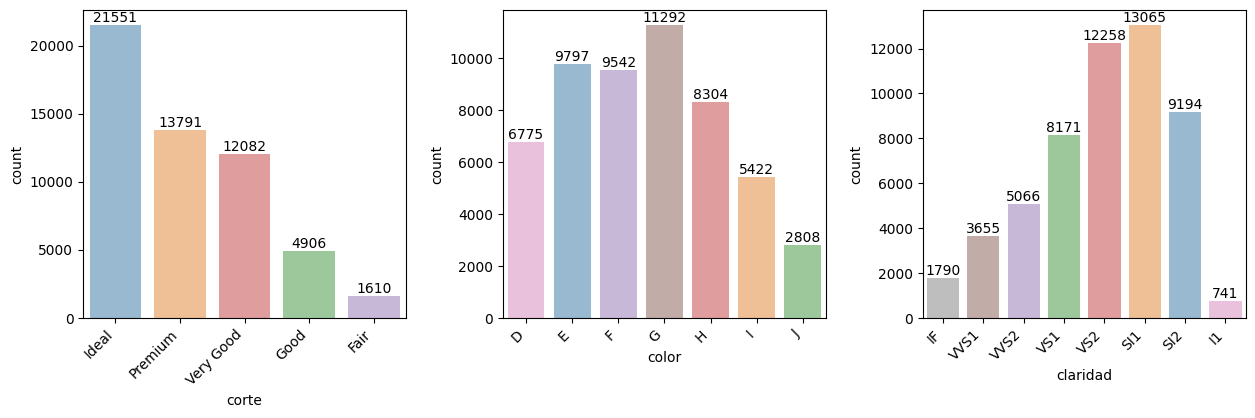

In [14]:
# Se puede usar cualquier lista de colores con nombres o codigos.
colores=['#FFEB3B','#FB8C00','#FF8A65','#D4E157','#00BCD4','#7986CB','#BA68C8']
# o extraer los de la paleta de colores de seaborn
colores=sns.color_palette("Set1", 10)

countpl(df,lista_categoricas,[lista_corte,lista_color,lista_claridad],None, [1, 3], [15, 4],[0.4,0.3],45)

##### Análisis de variables continuas.
Distribución.

##### Antes de todo se tratan los valores que se sabe con seguridad que físicamente no pueden ser reales.
$$x=0 \quad y=0 \quad z=0$$

##### Conteo para saber si son muchos relativamente o no para decidir que hacer.

In [15]:
condicion= (df['x']==0) | (df['y']==0) | (df['z']==0)
nceros=condicion.sum()
nceros

20

##### Son despreciables en comparación al total. Por lo tanto se eliminan.

In [16]:
dfc = df[~condicion] # Se crea otro dataframe con los cambios para llevar un seguimiento.

##### Se verifican los cambios.

In [17]:
print(f'Numero de Registros antes: {df.shape[0]}')
print(f'Numero de Registros despues: {dfc.shape[0]}')
print(f'Numero de Registros eliminados: {df.shape[0]-dfc.shape[0]}')
dfc.describe(percentiles=[]).round(2)

Numero de Registros antes: 53940
Numero de Registros despues: 53920
Numero de Registros eliminados: 20


,quilates,profundidad,mesa,precio,x,y,z
count,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00
mean,0.80,61.75,57.46,3930.99,5.73,5.73,3.54
std,0.47,1.43,2.23,3987.28,1.12,1.14,0.70
min,0.20,43.00,43.00,326.00,3.73,3.68,1.07
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


##### Se crea una Función que genere una matriz de histogramas de variables continuas.
<p style='text-align:center;'><strong><em>histo</em></strong> ( dataframe , lista de columnas , bins, colores , cuadrícula , aspecto , espaciado , rotación texto , kde )</p>

In [18]:
def histo(df, cols, nbins,colors=None,cuad=[1,1], asp=[15,6],e=[0.5,0.5],rot=0,show_kde=True):

    # Verificar que el número de columnas y filas sea válido
    if cuad[1] <= 0 or cuad[0] <= 0:
        raise ValueError("ncol y nrow deben ser mayores que cero")

    # Verificar que el número de columnas especificado sea válido
    if cuad[0] * cuad[1] < len(cols):
        raise ValueError("El número de columnas especificado es mayor que ncol * nrow")

    fig, axes = plt.subplots(cuad[0], cuad[1], figsize=(asp[0], asp[1]))
    ax = np.ravel(axes)

    if colors:
        colors = colors* ((len(cols) // len(colors)) + 1)

    for i, col in enumerate(cols):
        # Crear un nuevo objeto histplot en el eje correspondiente
        color = colors[i] if colors else None
        sns.histplot(df[col], bins=nbins[i], kde=show_kde, linewidth=0.01, alpha=0.5, ax=ax[i], color=color)

        # Verificar si hay línea (curva KDE) antes de intentar acceder a ella
        if show_kde and ax[i].lines:
            ax[i].lines[0].set_color("grey")
        ax[i].set_title(f"Distribución {col}")

        # Marcas (xticks) en los extremos inferiores de cada barra (bin)
        bin_left = [patch.get_x() for patch in ax[i].patches]
        bin_width = ax[i].patches[0].get_width()
        bin_left.append(bin_left[-1] + bin_width)
        ax[i].set_xticks(bin_left)
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=rot, ha="right")

        # Etiquetas sobre las barras
        for p in ax[i].patches:
            height = p.get_height()
            if height > 0:
                ax[i].annotate(
                    int(height),
                    (p.get_x() + p.get_width() / 2.0, height),
                    ha="center",
                    va="bottom",
                )
    plt.subplots_adjust(hspace=e[0], wspace=e[1])
    plt.show()
    return

##### Histogramas y distribución de Variables continuas.

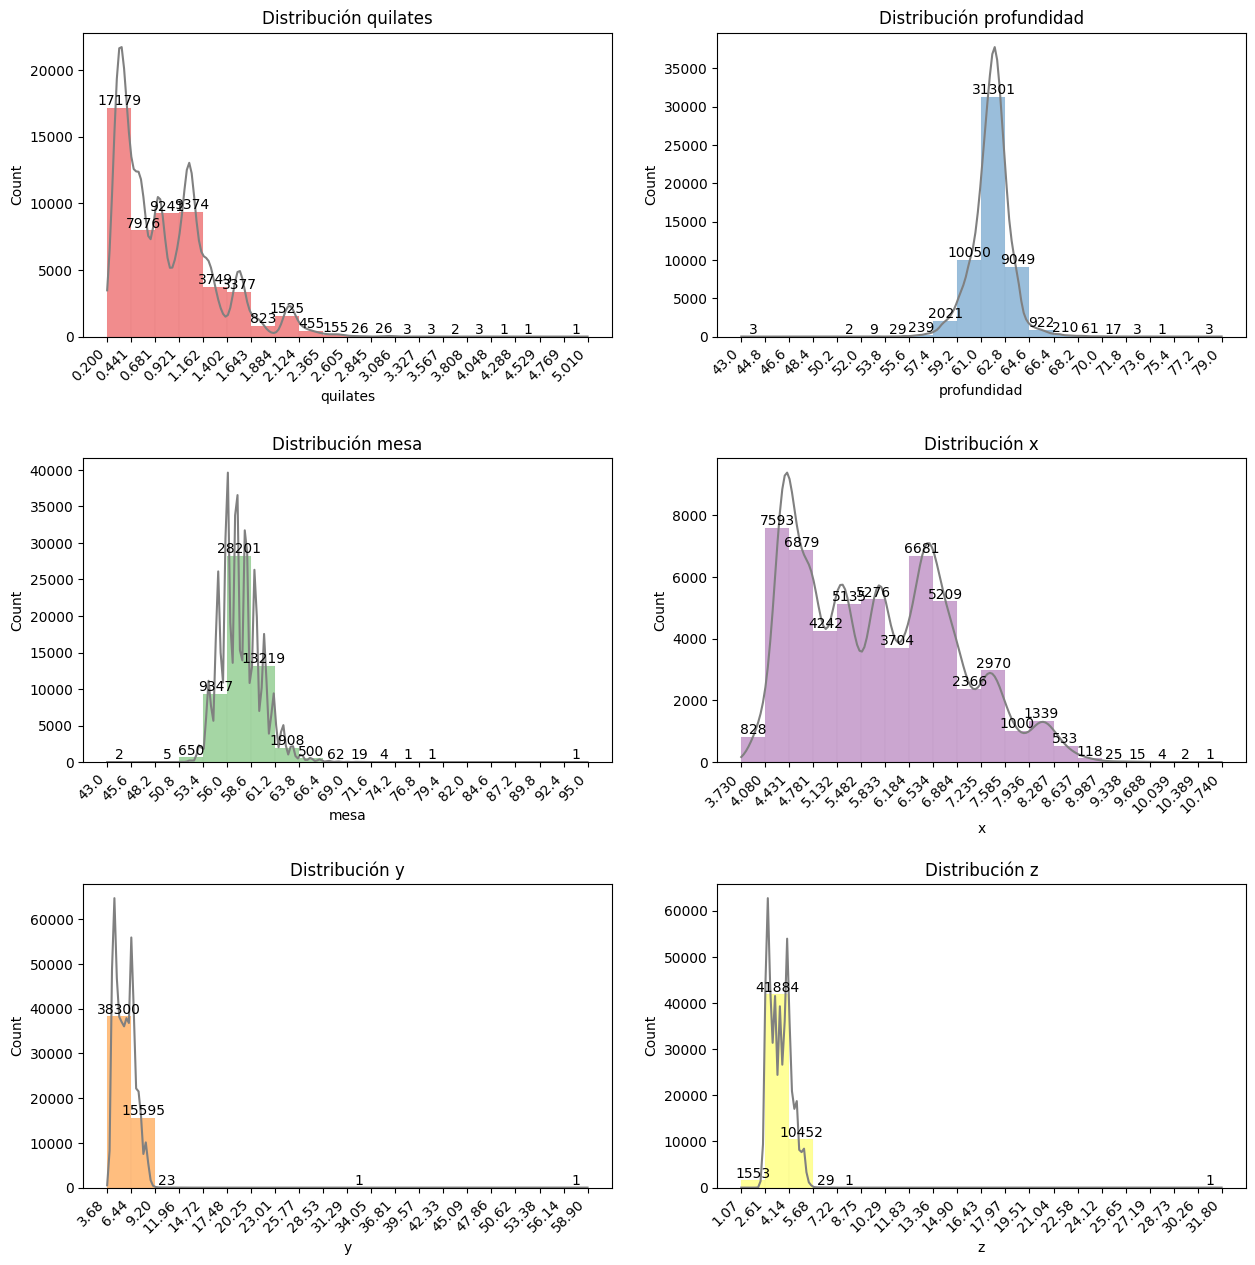

In [19]:
histo(dfc,lista_continuas, [20, 20, 20, 20, 20, 20],colores, [3, 2], [15, 15],[0.4,0.2],45,1)

##### Se crea una Función que genere una matriz de cajas de variables continuas.
<p style='text-align:center;'><strong><em>quartil</em></strong> ( dataframe , lista de columnas , colores , aspecto )</p>

In [20]:
# Crea subgráficos con boxplots para cada columna usando Seaborn

def quartil(df,cols,colors=None,cuad=[1,1],asp=[15,6]):

    # Verificar que el número de columnas y filas sea válido
    if cuad[1] <= 0 or cuad[0] <= 0:
        raise ValueError("ncol y nrow deben ser mayores que cero")

    # Verificar que el número de columnas especificado sea válido
    if cuad[0] * cuad[1] < len(cols):
        raise ValueError("El número de columnas especificado es mayor que ncol * nrow")
    
    fig, axes = plt.subplots(cuad[0], cuad[1], figsize=(asp[0], asp[1]))
    ax = np.ravel(axes)
    if colors:
        colors = colors* ((len(cols) // len(colors)) + 1)

    for i, column in enumerate(cols):
        color = colors[i] if colors else None
        sns.boxplot(x=df[column], ax=ax[i],color=color, boxprops=dict(alpha=0.5), whiskerprops=dict(alpha=0.5))
        ax[i].set_title(column)
        ax[i].set_xlabel('')
        
    # Ajusta la separación entre subgráficos
    plt.subplots_adjust(hspace=0.4, wspace=0.15)
    plt.show()

##### Cajas de variables continuas.

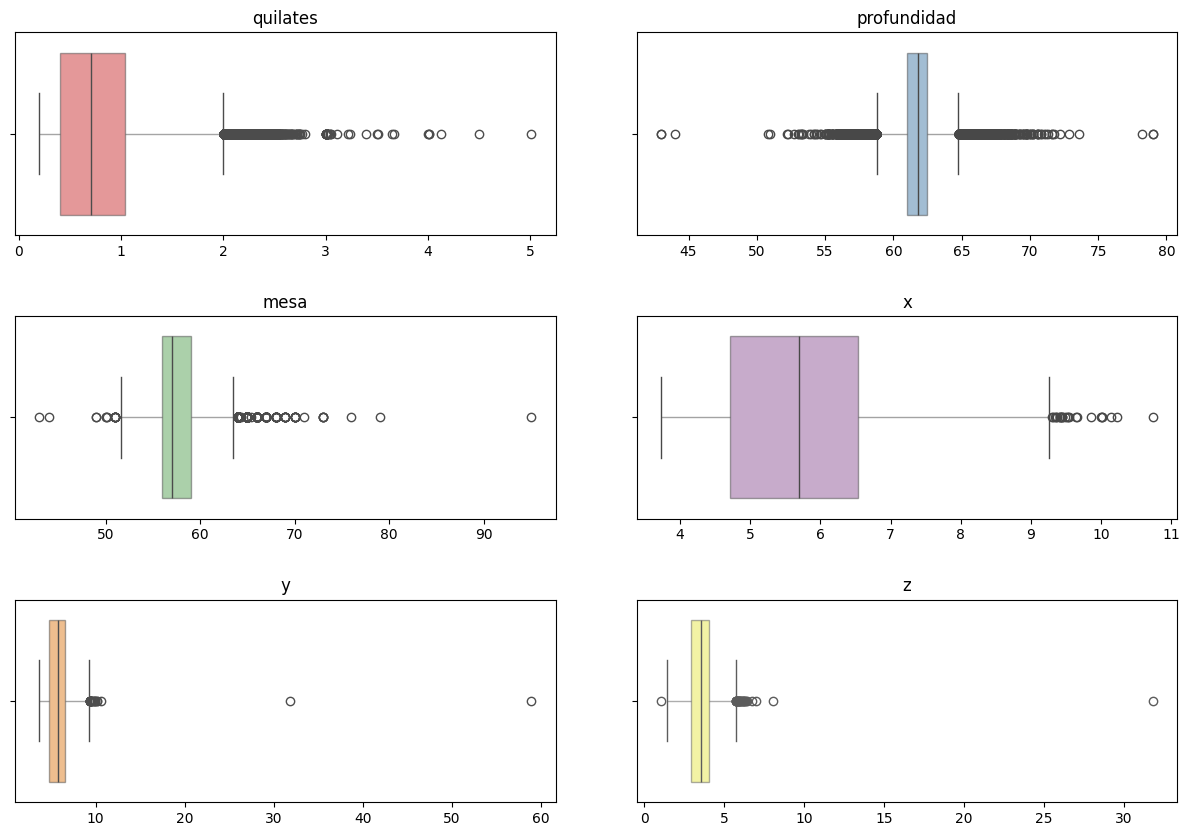

In [21]:
quartil(dfc,lista_continuas,colores,[3,2],[15,10])

##### Función que establece el intercuartil y elimina registros con valores fuera del intercuartil.
<p style='text-align:center;'><strong><em>cleanOut</em></strong> ( dataframe , lista de columnas )</p>

In [22]:
def cleanOut(df, cols):
    for col in cols:
        q1, q3 = df[col].quantile(q=0.25), df[col].quantile(q=0.75)
        iqr = q3 - q1
        outliers = (df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)
        df= df[~outliers].copy()
    return df

##### Eliminación de registros fuera del intercuartil y generación de graficas de caja para cada variable continua.

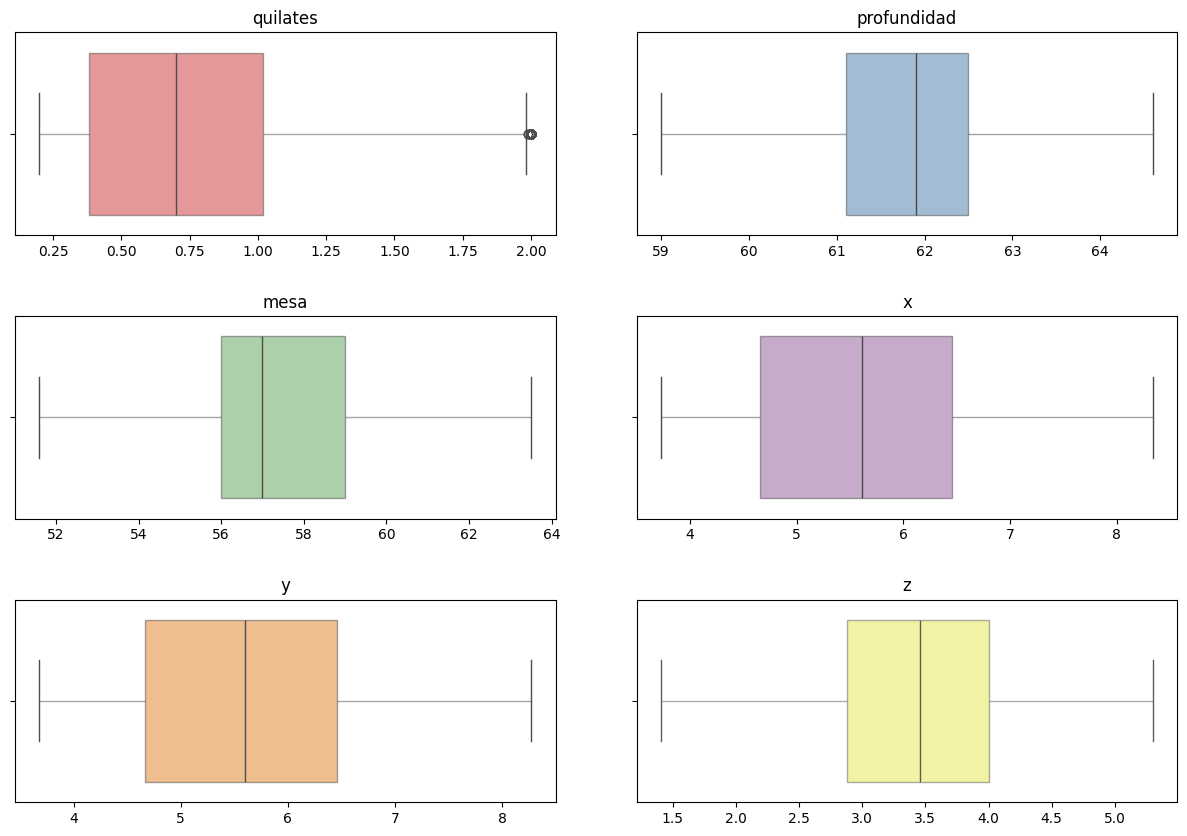

In [23]:
dff=cleanOut(dfc,['quilates', 'profundidad', 'mesa', 'x', 'y', 'z']) # Elimininación.

quartil(dff,['quilates', 'profundidad', 'mesa', 'x', 'y', 'z'],colores,[3,2],[15,10]) # Graficas.

##### Conteo de registros totales y eliminados luego de la exclusión de valores fuera del intercuartil.

In [24]:
print(f'Registros Totales antes:{dfc.shape[0]}')
print(f'Registros Totales después:{dff.shape[0]}')
print(f'Registros Eliminados:{dfc.shape[0]-dff.shape[0]}')

Registros Totales antes:53920
Registros Totales después:48898
Registros Eliminados:5022


##### Se Grafica de nuevo los histogramas de las variables continuas para verificar los cambios.

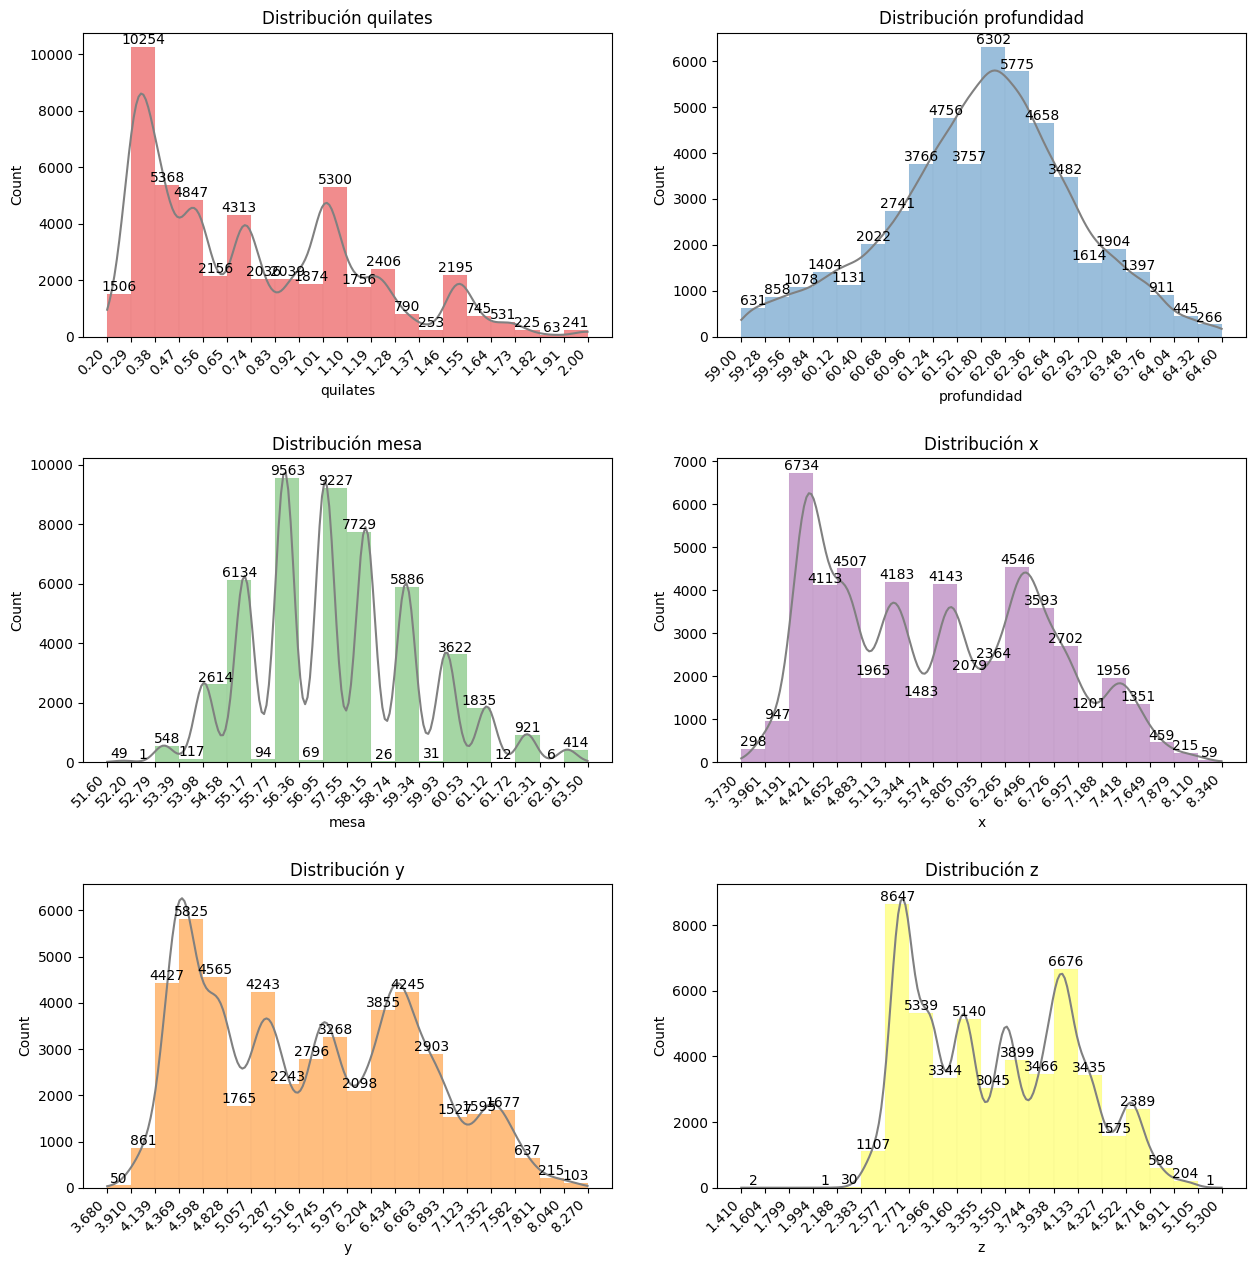

In [25]:
histo(dff, ['quilates', 'profundidad', 'mesa', 'x', 'y', 'z'], [20, 20, 20, 20, 20, 20],colores, [3, 2], [15, 15],[0.4,0.2],45,1)

### Reemplazo de valores de variables categóricas. 
***Corte, Color,*** y ***Claridad***.

***Corte***

In [26]:
ncorte=len(lista_corte)             # Se obtiene la cantidad de elementos de la escala de clasificación
cortev=np.arange(ncorte,0,-1)     # Se Fabrica la escala ordinal numérica en orden descendente.
corteR=dict(zip(lista_corte,cortev))    # Se fabrica el diccionario de reemplazo a partir de la lista de tuplas fabricada con zip.
corteR

{'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}

***Color***

In [27]:
ncolor=len(lista_color)
colorv=np.arange(ncolor,0,-1)
colorR=dict(zip(lista_color,colorv))
colorR
colorRP= ' '.join([f'{clave}: {valor}' for clave, valor in colorR.items()])
print("{",colorRP,"}")

{ D: 23 E: 22 F: 21 G: 20 H: 19 I: 18 J: 17 K: 16 L: 15 M: 14 N: 13 O: 12 P: 11 Q: 10 R: 9 S: 8 T: 7 U: 6 V: 5 W: 4 X: 3 Y: 2 Z: 1 }


***Claridad***

In [28]:
nclaridad=len(lista_claridad)
claridadv=np.arange(nclaridad,0,-1)
claridadR=dict(zip(lista_claridad,claridadv))
claridadRP= ' '.join([f'{clave}: {valor}' for clave, valor in claridadR.items()])
print("{",claridadRP,"}")

{ FL: 11 IF: 10 VVS1: 9 VVS2: 8 VS1: 7 VS2: 6 SI1: 5 SI2: 4 I1: 3 I2: 2 I3: 1 }


##### ***Reemplazos***

In [29]:
dffr=dff.copy()
dffr['corte_ordinal']=dffr['corte'].replace(corteR)
dffr['color_ordinal']=dffr['color'].replace(colorR)
dffr['claridad_ordinal']=dffr['claridad'].replace(claridadR)
dffr.head()

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z,corte_ordinal,color_ordinal,claridad_ordinal
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,22,4
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,22,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,18,6
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,17,4
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,17,8


In [30]:
# # Guardar el DataFrame en un archivo CSV
# dffr.to_csv('diamantes2.csv', index=False)

#### Establecimiento de Variables independientes y dependiente.

In [30]:
#Variables independientes o predictoras.
X = dffr[['quilates','profundidad','mesa','y','corte_ordinal','color_ordinal','claridad_ordinal']]
#Variable dependiente.
y = dffr['precio']

#### Datos de prueba y ajuste

In [31]:
#Se importa método train_test_split para formar aleatoriamente una muestra de entrenamiento y otra de prueba.
#Esto se hace especificamente para metodos de ajuste como bosque aleatorio.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)

##### Como primera aproximación se toma un modelo lineal.
Se utilza el módulo statsmodels. Con los registros de entrenamiento o ajuste.

In [32]:
import statsmodels.api as sm

#Matriz de diseño. Es la matriz X que se le agrega una columna de unos para tener en cuenta la ordenada al origen, o intercepto.
x = sm.add_constant(X_train)

# Ajuste de la regresión lineal múltiple
model = sm.OLS(y_train, x).fit()

# Imprimir los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 5.258e+04
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:30:43   Log-Likelihood:            -3.2812e+05
No. Observations:               39118   AIC:                         6.563e+05
Df Residuals:                   39110   BIC:                         6.563e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5482.4022    536.894  

##### Ahora se hace con el módulo LinearRegression de sklearn.linear_model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()
model = regr.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred2 = model.predict(X_train)

print(f"RMSE puntaje: {np.sqrt(mean_squared_error((y_test),(y_pred))).round(2)}")
print(f"RMSE: {np.sqrt(mean_squared_error((y_train),(y_pred2))).round(2)}")
print(f"R2 puntaje : {r2_score((y_test),(y_pred)).round(4)}")
print(f"R puntaje : {np.sqrt(r2_score((y_test),(y_pred))).round(4)}")
print(f"R2  : {r2_score((y_train),(y_pred2)).round(4)}")
print(f"R  : {np.sqrt(r2_score((y_train),(y_pred2))).round(4)}")

# Obtener los coeficientes de la regresión
coef = model.coef_.round(0)
intercept = model.intercept_.round(0)

# Obtener los errores estándar de los coeficientes
std_e = np.sqrt(np.diag(np.linalg.inv(X_train.T @ X_train) * (np.sum((y_train - model.predict(X_train)) ** 2) / (X_train.shape[0] - X_train.shape[1])))).round(0)

# Imprimir los coeficientes y el intercepto
print("Coeficientes:")
print(f"quilates: {coef[0]} ± {std_e[0]}")
print(f"profundiad: {coef[1]} ± {std_e[1]}")
print(f"mesa: {coef[2]} ± {std_e[2]}")
print(f"y: {coef[3]} ± {std_e[3]}")
print(f"corte_ordinal: {coef[4]} ± {std_e[4]}")
print(f"color_ordinal: {coef[5]} ± {std_e[5]}")
print(f"claridad_ordinal: {coef[6]} ± {std_e[6]}")
print("Intercección:", intercept)

RMSE puntaje: 1045.99
RMSE: 1063.21
R2 puntaje : 0.9073
R puntaje : 0.9525
R2  : 0.9039
R  : 0.9508
Coeficientes:
quilates: 13666.0 ± 72.0
profundiad: -125.0 ± 2.0
mesa: -53.0 ± 2.0
y: -1956.0 ± 28.0
corte_ordinal: 45.0 ± 6.0
color_ordinal: 322.0 ± 3.0
claridad_ordinal: 472.0 ± 4.0
Intercección: 5482.0


#### Finalmente se realiza una regresión de bosque aleatorio que es más adecuado para ajustes con variables catagoricas (en este caso además ordinales).

In [34]:
from sklearn.ensemble import RandomForestRegressor

rr  = RandomForestRegressor()
rr.fit(X_train,y_train)
y_pred = rr.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 436.432773348218
R2  : 0.9919015463760257


En este caso se podria determinar el precio de un diamante con un error medio de 436 dólares.